In [7]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
np.random.seed(0)

X = np.random.randn(200, 2)
y = (X[:, 0] + X[:, 1] > 1).astype(int)

In [3]:
X

array([[ 1.76405235,  0.40015721],
       [ 0.97873798,  2.2408932 ],
       [ 1.86755799, -0.97727788],
       [ 0.95008842, -0.15135721],
       [-0.10321885,  0.4105985 ],
       [ 0.14404357,  1.45427351],
       [ 0.76103773,  0.12167502],
       [ 0.44386323,  0.33367433],
       [ 1.49407907, -0.20515826],
       [ 0.3130677 , -0.85409574],
       [-2.55298982,  0.6536186 ],
       [ 0.8644362 , -0.74216502],
       [ 2.26975462, -1.45436567],
       [ 0.04575852, -0.18718385],
       [ 1.53277921,  1.46935877],
       [ 0.15494743,  0.37816252],
       [-0.88778575, -1.98079647],
       [-0.34791215,  0.15634897],
       [ 1.23029068,  1.20237985],
       [-0.38732682, -0.30230275],
       [-1.04855297, -1.42001794],
       [-1.70627019,  1.9507754 ],
       [-0.50965218, -0.4380743 ],
       [-1.25279536,  0.77749036],
       [-1.61389785, -0.21274028],
       [-0.89546656,  0.3869025 ],
       [-0.51080514, -1.18063218],
       [-0.02818223,  0.42833187],
       [ 0.06651722,

In [4]:
y

array([1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1])

In [5]:
df = pd.DataFrame(X, columns=['feature1', 'feature2'])
df['label'] = y

In [6]:
df.head()

,feature1,feature2,label
0,1.764052,0.400157,1
1,0.978738,2.240893,1
2,1.867558,-0.977278,0
3,0.950088,-0.151357,0
4,-0.103219,0.410599,0


In [9]:
X = df.drop('label', axis=1)
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

In [10]:
model = DecisionTreeClassifier(max_depth=3)

In [11]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [12]:
y_pred = model.predict(X_test)
accuracy_score(y_pred, y_test)

0.875

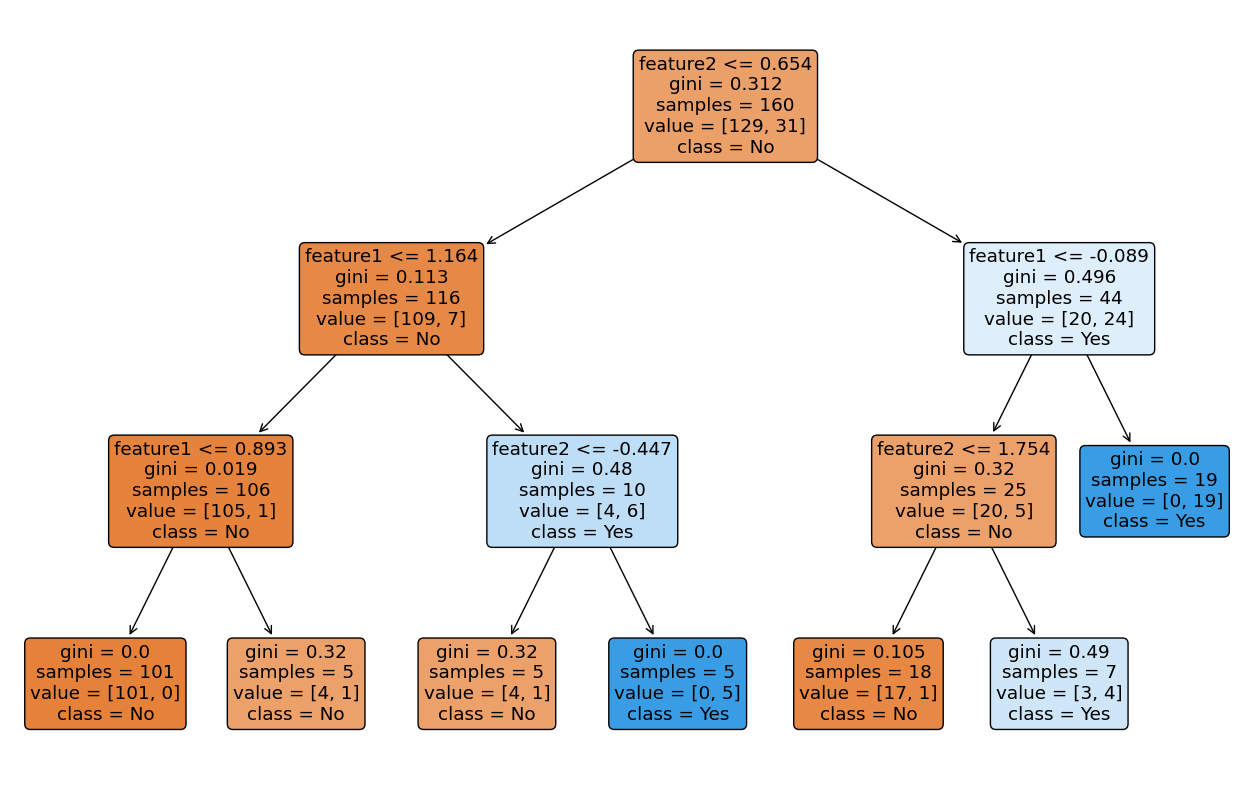

In [20]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 10))
tree.plot_tree(
    model, 
    feature_names = X.columns,
    class_names = ['No', 'Yes'],
    filled=True,
    rounded=True
)

plt.show()

In [21]:
df = pd.read_csv("data/Titanic-Dataset.csv")

In [22]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]

In [24]:
df.dropna(inplace=True)

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])

In [27]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250
3,1,1,0,35.0,53.1000
4,0,3,1,35.0,8.0500


In [28]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

0.7482517482517482

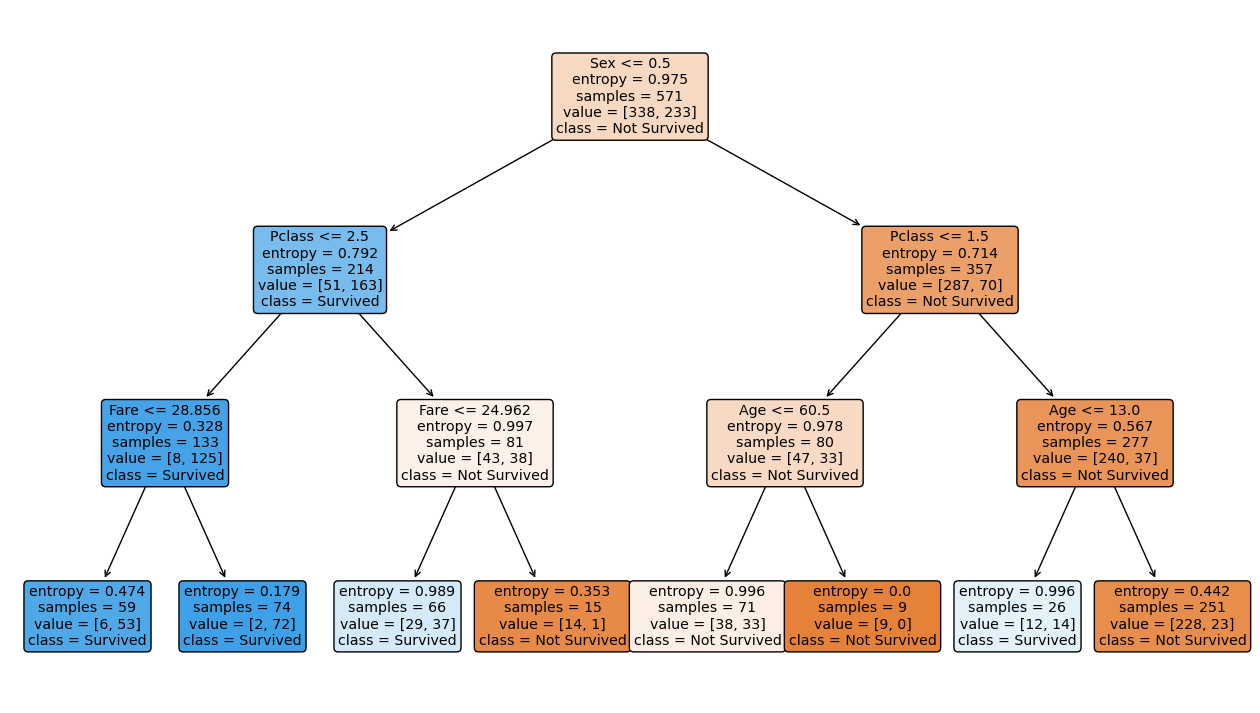

In [52]:
model = DecisionTreeClassifier(max_depth=3, criterion='entropy')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
display(accuracy_score(y_pred, y_test))

plt.figure(figsize=(16, 9))
tree.plot_tree(
    model,
    feature_names = X.columns,
    class_names = ['Not Survived', 'Survived'],
    filled=True,
    rounded=True
)
plt.show()

In [ ]:
# Hyperparameter Tuning
model = DecisionTreeClassifier(
    max_depth = 4,
    min_samples_split = 10,
    min_samples_leaf = 4,
    criterion = 'entropy'
)
model.fit(X_train, y_train)

In [49]:
gini_values = model.tree_.impurity
gini_values

array([0.48309262, 0.36304481, 0.11306462, 0.5       , 0.        ,
       0.        , 0.10115961, 0.18549346, 0.16004925, 0.        ,
       0.02702196, 0.        , 0.13265306, 0.4980948 , 0.49265381,
       0.48      , 0.21875   , 0.4933432 , 0.27777778, 0.        ,
       0.        , 0.12444444, 0.        , 0.27777778, 0.        ,
       0.        , 0.31526336, 0.4846875 , 0.49987402, 0.        ,
       0.49870727, 0.        , 0.49519416, 0.20761246, 0.        ,
       0.40816327, 0.        , 0.27777778, 0.23146398, 0.49704142,
       0.        , 0.44444444, 0.27777778, 0.15277778, 0.16647355,
       0.15106098, 0.19873832, 0.0768    , 0.46875   , 0.        ,
       0.        ])

In [62]:
from sklearn.metrics import confusion_matrix
def get_accuracy_score(model):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    display(accuracy_score(pred, y_test))
    display(confusion_matrix(pred, y_test))
    print("=====================")

model1 = DecisionTreeClassifier(
    max_depth = 5,
    min_samples_split = 11,
    min_samples_leaf = 6,
    criterion = 'entropy'
)

model2 = DecisionTreeClassifier(
    max_depth = 4,
    min_samples_split = 10,
    min_samples_leaf = 8,
    criterion = 'log_loss'
)

model3 = DecisionTreeClassifier(
    max_depth = 7,
    min_samples_split = 11,
    min_samples_leaf = 6,
    criterion = 'gini'
)

for model in [model1, model2, model3]:
    get_accuracy_score(model)

0.7762237762237763

array([[72, 18],
       [14, 39]])

0.7552447552447552

array([[74, 23],
       [12, 34]])

0.7902097902097902

array([[77, 21],
       [ 9, 36]])